In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [6]:
# connect
con = sqlite3.connect('berdo_better.db 2')
con


In [30]:

q2 = """select distinct "Property Name", "% Electricity", "% Gas"
from berdo_better_full
where year like 2020 and "Property Type" like '%College%' and zip like '02115'
and ("Property Name" like '%Davenport%' or "Property Name" like '%Rubenstein%'
    or "Property Name" like '%Smith%' or "Property Name" like '%International%'
    or "Property Name" like '%ISEC%' or "Property Name" like '%Northeastern%'
    --or "Property Name" like '%wentworth%'
    )
order by "GHG Emissions (MTCO2e)" desc;"""

data_1 = pd.read_sql_query(q2, con)
data_1

df = pd.DataFrame(data_1)
df['% Electricity'] *= 100
df['% Gas'] *= 100
electricity_percentages = df['% Electricity']
property_names = df['Property Name']
gas_percentages = df['% Gas'] 
property_names

0                   Northeastern University Big Campus
1    Interdisciplinary Science & Engineering Comple...
2                                International Village
3                                  Davenport Commons A
4                                           Smith Hall
5                                  Davenport Commons B
6                           Rubenstein,Burstein Campus
Name: Property Name, dtype: object

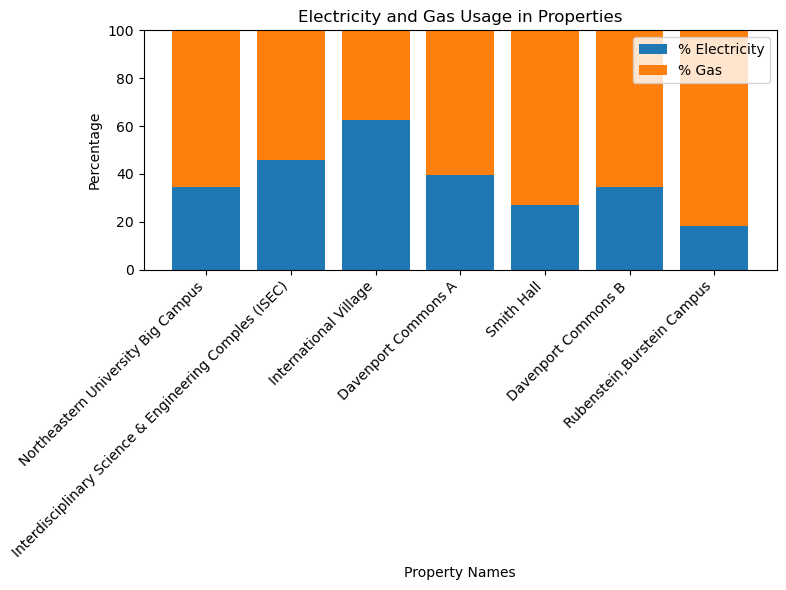

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(property_names, electricity_percentages, label='% Electricity')
ax.bar(property_names, gas_percentages, bottom=electricity_percentages, label='% Gas')
ax.set_xlabel('Property Names')
ax.set_ylabel('Percentage')
ax.set_title('Electricity and Gas Usage in Properties')
ax.legend()


plt.ylim([0, 100])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()